# Scipy Stats Jupter notebook

#### Scipy stats is a module contained within the scipy python package [1]. This sub package is used to carry out statistical analysis of datasets in a quick easy to use manner. This module consists of a library of Statistical functions, along with an ever growing library of statistical functions.

#### One of these distributions provided by scipy.stats is the Normal Continous Random Variable. This distribution is one in which a random variable X can take any value an example of the Normal Continous Random Variable can be seen below.

In [1]:
#I first import the distribution from the scipy.stats package.
from scipy.stats import norm
# I then import numpy.
import numpy as np
#I now generate an array of numbers using the norm.cdf function.
print (norm.cdf(np.array([1,-1.,0,1,2,3,4])))

[0.84134475 0.15865525 0.5        0.84134475 0.97724987 0.9986501
 0.99996833]


In [2]:
print (norm.ppf(0.5))

0.0


## ANOVA

#### Anova stands for analysis of variance and is a method used in statistical analysis to test 3 or more groups for mean differences of continueous response variables [2]. There are two types of ANOVA, these are one-way ANOVA and two-way ANOVA. One-way ANOVA. A one-way ANOVA is used to compare a single dependant variable with a single independant variable also known a a category. A two-way ANOVA is used to compare a single dependant variable with 2 and more independant variables.

***
#### One-way ANOVA




#### In order to carry out a one-way ANOVA there are 6 assumptions that must be met in order to ensure that the data is suitable for this type of test. The 6 assumptions are:

#### 1) The dependant variable must be measured at the interval level meaning they are continueous.
#### 2) The independant variable must conpose of more than 1 groups.
#### 3) There should be 'independance of observations' which means that the observations should not be related to the group or      there should be no relationship between the groups.
#### 4) There should be no outliers. This is data that deviates greatly from the mean and do not follow any particular pattern.
#### 5) The dependant variable must be 'normally distributed' for each category of the independant variable. We will use a Shapiro-Wilk to test for this.
#### 6) There most be homogeneity of variances. This can be determined by carrying out the Levenes test for homogeneity of variance. [3] 

In [3]:
# I start by importing the necessary python packages to carry out the One-way ANOVA.
%matplotlib inline
import pandas as pd

# I then load the dataset I will be using to demonstrate the ANOVA method.
df = pd.read_csv("data/Diet.csv")
df
# I will now change the Diet column to a string to make it easier to use later.


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightloss6weeks
0,25,1,41,171,60,2,60.0,0.0
1,26,1,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


#### The above dataset is an analysis of the results that people obtain after a period of 6 weeks on 3 different types of diet. This dataset fufills the necessary requirements outlined in the first four assumptions of the one-way ANOVA test. For the above dataset I am going to use one-way ANOVA to determine which diet was better for weightloss. In this instance the dependant variable is the weightloss6weeks and the independant variable is the Diet. I now determine whether the above data is suitable for a one-way ANOVA based on assumption 4. I will determine whether or not there are any outliers in the variable I will be investigating. I will do this using a boxplot.

In [4]:
# I first select the column I will be working it and give it the variable name 'dependant'.
dependant = df["weightloss6weeks"]
independant = df["Diet"].astype('category')

# I will now change the Diet column to a category to allow me to show the boxplot below for all 3 diets



C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


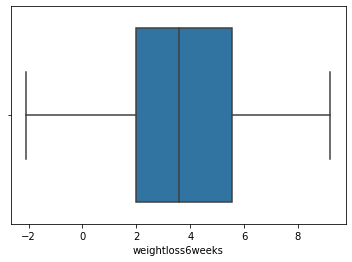

In [5]:
# I will then import seaborn in order to generate a boxplot.
import seaborn as sns
# I call the command to generate the boxplot.
sns.boxplot(dependant)

#### As can be seen from the above boxplot, there are no outliers within the dependant variable weightloss6weeks. I will now separate the weightloss6weeks into the 3 diet groups to check for outliers.

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


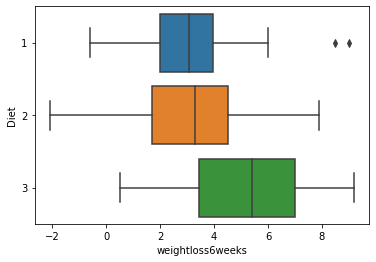

In [9]:
# This time I will plot both the dependant and independant variables. This should produce 3 boxplot, each one representing
# a diet
sns.boxplot(dependant, independant);

#### As can be seen from the above plot there are two outliers in relation to diet 1. Due to the nature of this dataset it is likely that these outliers are genuine as there are much more factors involved in weightloss that vary between individuals then only the factors explored in this dataset for example food intolerances, individuals metabolism and activity level.

#### The next thing I am going to do is check for assumption 5 being present in the dataset. In order to do this I will run a Shapiro-Wilk to ensure that my dependant variable weightloss6weeks is normally distributed. Prior to doing this I will plot a distribution plot again using the seaborn library to get a visual idea as to whether or not the depentant variable is of normal distribution.

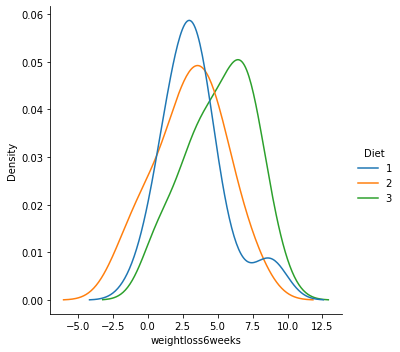

In [10]:
sns.displot(x=dependant, hue=independant, kind="kde")

In [11]:
# I can now carry out the Shapiro-Wilk test on the data to verify the dependant variable is normally distributed.
import scipy.stats as ss